In [2]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
# Load the training set
train_file_path = '/kaggle/input/unsw-nb15/UNSW_NB15_training-set.parquet'
train_data = pd.read_parquet(train_file_path)

# Load the testing set
test_file_path = '/kaggle/input/unsw-nb15/UNSW_NB15_testing-set.parquet'
test_data = pd.read_parquet(test_file_path)

In [4]:
# Display basic info about the datasets
print("Training Data Info:")
print(train_data.info())

print("\nTesting Data Info:")
print(test_data.info())

# Optionally, display the first few rows
print("\nFirst few rows of training data:")
display(train_data.head())

print("\nFirst few rows of testing data:")
display(test_data.head())

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 36 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   dur                175341 non-null  float32 
 1   proto              175341 non-null  category
 2   service            175341 non-null  category
 3   state              175341 non-null  category
 4   spkts              175341 non-null  int16   
 5   dpkts              175341 non-null  int16   
 6   sbytes             175341 non-null  int32   
 7   dbytes             175341 non-null  int32   
 8   rate               175341 non-null  float32 
 9   sload              175341 non-null  float32 
 10  dload              175341 non-null  float32 
 11  sloss              175341 non-null  int16   
 12  dloss              175341 non-null  int16   
 13  sinpkt             175341 non-null  float32 
 14  dinpkt             175341 non-null  float32 
 15  sjit          

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sload,...,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,attack_cat,label
0,0.121478,tcp,-,FIN,6,4,258,172,74.087486,14158.942383,...,0,0,1,1,0,0,0,0,Normal,0
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473373,8395.112305,...,0,0,1,1,0,0,0,0,Normal,0
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,1572.271851,...,0,0,1,1,0,0,0,0,Normal,0
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,2740.178955,...,0,0,1,1,1,1,0,0,Normal,0
4,0.449454,tcp,-,FIN,10,6,534,268,33.373825,8561.499023,...,0,0,2,1,0,0,0,0,Normal,0



First few rows of testing data:


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sload,...,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,attack_cat,label
0,0.000011,udp,-,INT,2,0,496,0,90909.09375,180363632.0,...,0,0,1,1,0,0,0,0,Normal,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.00000,881000000.0,...,0,0,1,1,0,0,0,0,Normal,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.00000,854400000.0,...,0,0,1,1,0,0,0,0,Normal,0
3,0.000006,udp,-,INT,2,0,900,0,166666.65625,600000000.0,...,0,0,2,1,0,0,0,0,Normal,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.00000,850400000.0,...,0,0,2,1,0,0,0,0,Normal,0


In [5]:
# Print dimensions of the datasets
print("Training Data Dimensions (rows, columns):", train_data.shape)
print("Testing Data Dimensions (rows, columns):", test_data.shape)

Training Data Dimensions (rows, columns): (175341, 36)
Testing Data Dimensions (rows, columns): (82332, 36)


In [6]:
# Check for missing values in both training and testing datasets
print("Missing values in Training Data:")
print(train_data.isnull().sum())

print("\nMissing values in Testing Data:")
print(test_data.isnull().sum())

Missing values in Training Data:
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
is_sm_ips_ports      0
attack_cat           0
label                0
dtype: int64

Missing values in Testing Data:
dur                  0
proto                0
service              0
state                0
s

In [7]:
# Check for duplicate rows in the training and testing datasets
print("Duplicate rows in Training Data:", train_data.duplicated().sum())
print("Duplicate rows in Testing Data:", test_data.duplicated().sum())

Duplicate rows in Training Data: 78519
Duplicate rows in Testing Data: 32361


In [8]:
# Statistical summary for training data
print("Statistical Summary of Training Data:")
display(train_data.describe())

# Statistical summary for testing data
print("\nStatistical Summary of Testing Data:")
display(test_data.describe())

Statistical Summary of Training Data:


,dur,spkts,dpkts,sbytes,dbytes,rate,sload,dload,sloss,dloss,...,dmean,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,label
count,175341.000000,175341.000000,175341.000000,1.753410e+05,1.753410e+05,175341.000000,1.753410e+05,1.753410e+05,175341.000000,175341.000000,...,175341.000000,175341.000000,1.753410e+05,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000
mean,1.359389,20.298664,18.969591,8.844844e+03,1.492892e+04,95406.179688,7.345403e+07,6.712056e+05,4.953000,6.948010,...,124.173382,0.105982,2.144292e+03,5.383538,4.206255,0.014948,0.014948,0.133066,0.015752,0.680622
std,6.483313,136.887597,110.258271,1.747656e+05,1.436542e+05,165417.671875,1.883701e+08,2.423637e+06,66.005059,52.732999,...,258.317056,0.776911,5.420797e+04,8.047104,5.783585,0.126048,0.126048,0.701208,0.124516,0.466237
min,0.000000,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,32.786140,1.305334e+04,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.001582,2.000000,2.000000,4.300000e+02,1.640000e+02,3225.806641,8.796748e+05,1.447023e+03,0.000000,0.000000,...,44.000000,0.000000,0.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.668069,12.000000,10.000000,1.418000e+03,1.102000e+03,125000.000000,8.888889e+07,2.784487e+04,3.000000,2.000000,...,89.000000,0.000000,0.000000e+00,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,59.999989,9616.000000,10974.000000,1.296523e+07,1.465555e+07,1000000.000000,5.988000e+09,2.242273e+07,4803.000000,5484.000000,...,1458.000000,172.000000,6.558056e+06,51.000000,46.000000,4.000000,4.000000,30.000000,1.000000,1.000000



Statistical Summary of Testing Data:


,dur,spkts,dpkts,sbytes,dbytes,rate,sload,dload,sloss,dloss,...,dmean,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,82332.000000,8.233200e+04,8.233200e+04,82332.000000,82332.000000,...,82332.000000,82332.000000,8.233200e+04,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,82410.890625,6.454902e+07,6.305470e+05,4.753692,6.308556,...,116.275069,0.094277,1.595372e+03,4.928898,3.663011,0.008284,0.008381,0.129743,0.011126,0.550600
std,4.709841,133.916353,115.574086,1.716423e+05,1.514715e+05,148654.421875,1.798863e+08,2.393292e+06,64.649620,55.708021,...,244.600271,0.542922,3.806697e+04,8.389545,5.915386,0.091171,0.092485,0.638683,0.104891,0.497436
min,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,28.606114,1.120247e+04,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2650.176758,5.770032e+05,2.112951e+03,1.000000,0.000000,...,44.000000,0.000000,0.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,111111.109375,6.514286e+07,1.585808e+04,3.000000,2.000000,...,87.000000,0.000000,0.000000e+00,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1000000.000000,5.268000e+09,2.082111e+07,5319.000000,5507.000000,...,1500.000000,131.000000,5.242880e+06,59.000000,38.000000,2.000000,2.000000,16.000000,1.000000,1.000000


In [9]:
# Check class distribution in the training set
print("Class distribution in Training Data ('label' column):")
print(train_data['label'].value_counts())

# Check attack categories distribution in the training set
print("\nAttack categories distribution in Training Data ('attack_cat' column):")
print(train_data['attack_cat'].value_counts())

# Check class distribution in the testing set
print("\nClass distribution in Testing Data ('label' column):")
print(test_data['label'].value_counts())

# Check attack categories distribution in the testing set
print("\nAttack categories distribution in Testing Data ('attack_cat' column):")
print(test_data['attack_cat'].value_counts())

Class distribution in Training Data ('label' column):
label
1    119341
0     56000
Name: count, dtype: int64

Attack categories distribution in Training Data ('attack_cat' column):
attack_cat
Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: count, dtype: int64

Class distribution in Testing Data ('label' column):
label
1    45332
0    37000
Name: count, dtype: int64

Attack categories distribution in Testing Data ('attack_cat' column):
attack_cat
Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: count, dtype: int64


Class distribution (normal vs attack) in Training Data:
label
1    119341
0     56000
Name: count, dtype: int64


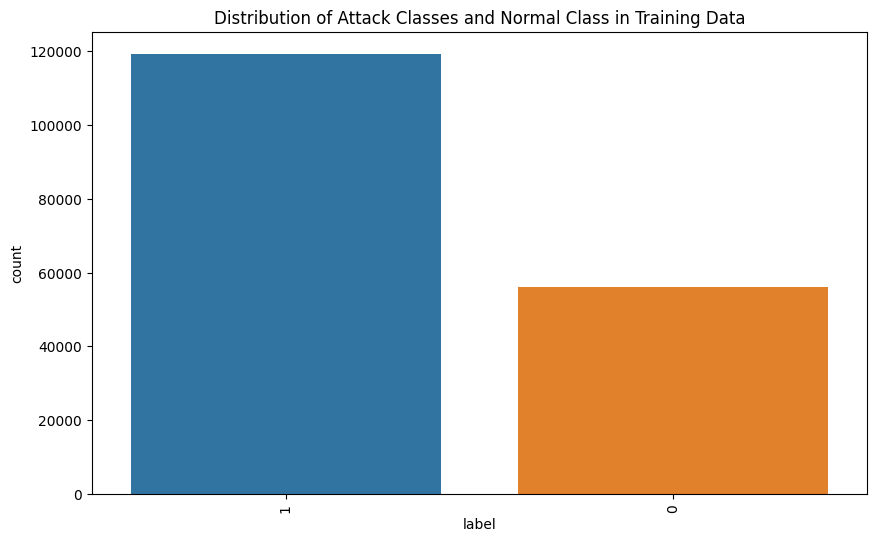

In [10]:
# Assuming the target label column is named 'label' and contains both normal and attack class info
if 'label' in train_data.columns:
    print("Class distribution (normal vs attack) in Training Data:")
    print(train_data['label'].value_counts())

    # Plot the distribution of classes
    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.figure(figsize=(10, 6))
    sns.countplot(data=train_data, x='label', order=train_data['label'].value_counts().index)
    plt.xticks(rotation=90)
    plt.title('Distribution of Attack Classes and Normal Class in Training Data')
    plt.show()


Attack Type Distribution in Training Data:
attack_cat
Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


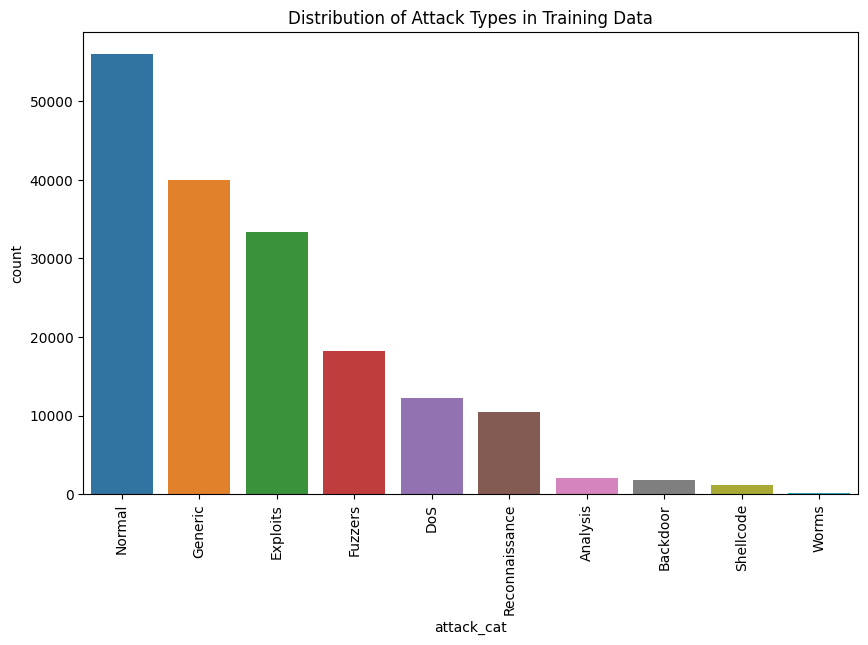

In [11]:
# Check the breakdown of different attack classes
if 'attack_cat' in train_data.columns:
    print("\nAttack Type Distribution in Training Data:")
    print(train_data['attack_cat'].value_counts())

    # Plot attack type distribution
    plt.figure(figsize=(10, 6))
    sns.countplot(data=train_data, x='attack_cat', order=train_data['attack_cat'].value_counts().index)
    plt.xticks(rotation=90)
    plt.title('Distribution of Attack Types in Training Data')
    plt.show()


Protocol Distribution in Training Data:
proto
tcp      79946
udp      63283
unas     12084
arp       2859
ospf      2595
         ...  
argus       98
hmp         98
igmp        18
icmp        15
rtp          1
Name: count, Length: 133, dtype: int64


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


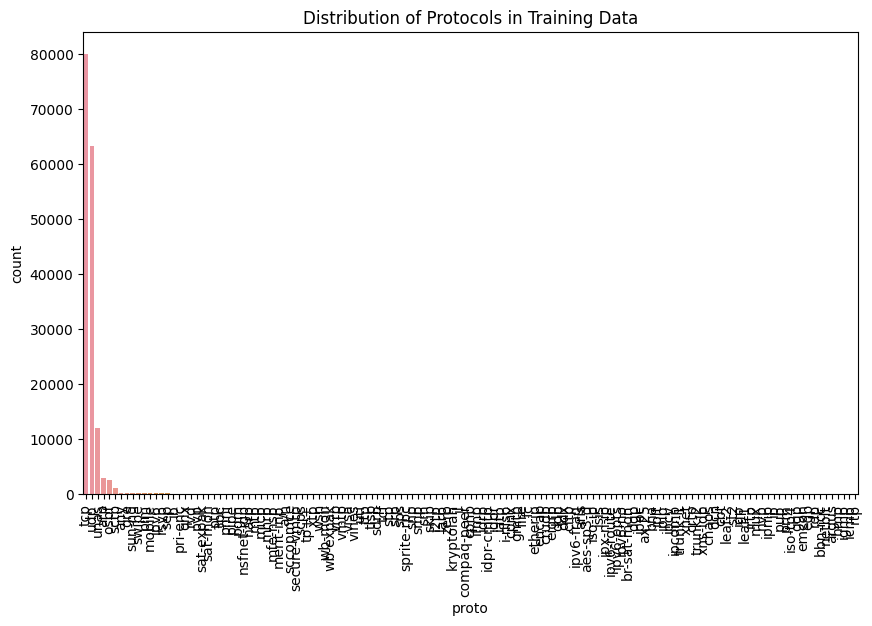


Service Distribution in Training Data:
service
-           94168
dns         47294
http        18724
smtp         5058
ftp-data     3995
ftp          3428
ssh          1302
pop3         1105
dhcp           94
snmp           80
ssl            56
irc            25
radius         12
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


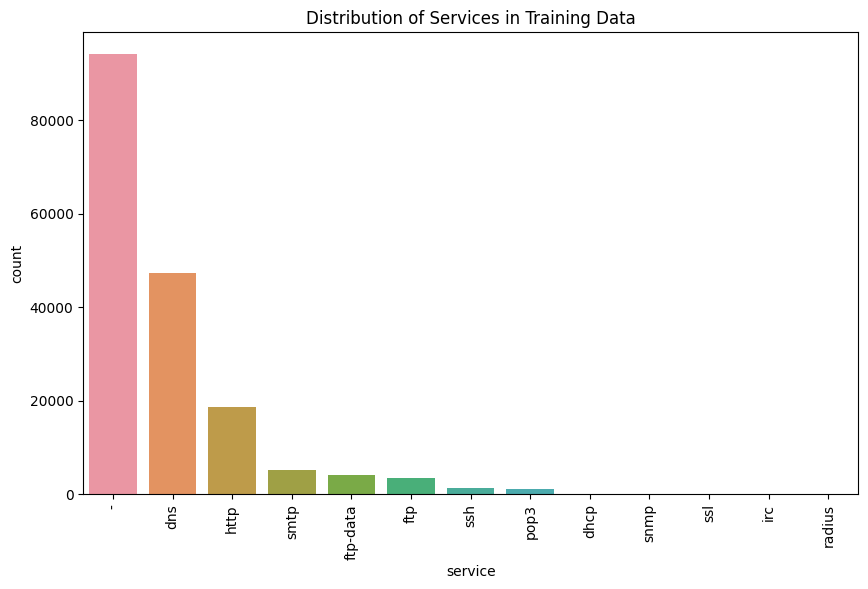

In [12]:
# Examine protocol distribution
if 'proto' in train_data.columns:
    print("\nProtocol Distribution in Training Data:")
    print(train_data['proto'].value_counts())

    # Plot protocol distribution
    plt.figure(figsize=(10, 6))
    sns.countplot(data=train_data, x='proto', order=train_data['proto'].value_counts().index)
    plt.xticks(rotation=90)
    plt.title('Distribution of Protocols in Training Data')
    plt.show()

# Examine service distribution (if available)
if 'service' in train_data.columns:
    print("\nService Distribution in Training Data:")
    print(train_data['service'].value_counts())

    # Plot service distribution
    plt.figure(figsize=(10, 6))
    sns.countplot(data=train_data, x='service', order=train_data['service'].value_counts().index)
    plt.xticks(rotation=90)
    plt.title('Distribution of Services in Training Data')
    plt.show()

In [13]:
# Cross-tabulate proto with attack classes
if 'label' in train_data.columns and 'proto' in train_data.columns:
    proto_attack_distribution = pd.crosstab(train_data['proto'], train_data['label'])
    print("\nProtocol vs Attack Type Cross-tab:")
    print(proto_attack_distribution)

# Cross-tabulate service with attack classes (if service feature exists)
if 'label' in train_data.columns and 'service' in train_data.columns:
    service_attack_distribution = pd.crosstab(train_data['service'], train_data['label'])
    print("\nService vs Attack Type Cross-tab:")
    print(service_attack_distribution)


Protocol vs Attack Type Cross-tab:
label      0    1
proto            
3pc        0  100
a/n        0  100
aes-sp3-d  0  100
any        0  300
argus      0   98
...       ..  ...
wsn        0  100
xnet       0   99
xns-idp    0   99
xtp        0  100
zero       0  100

[133 rows x 2 columns]

Service vs Attack Type Cross-tab:
label         0      1
service               
-         36512  57656
dhcp          0     94
dns        7493  39801
ftp        1218   2210
ftp-data   2552   1443
http       5348  13376
irc           0     25
pop3          4   1101
radius        2     10
smtp       1579   3479
snmp          1     79
ssh        1291     11
ssl           0     56


Highly Correlated Features:
           Feature 1         Feature 2  Correlation
0             sbytes             spkts     0.963791
1             dbytes             dpkts     0.971907
2              sloss             spkts     0.971069
3              sloss            sbytes     0.996109
4              dloss             dpkts     0.978636
5              dloss            dbytes     0.996504
6               dwin              swin     0.990140
7             synack            tcprtt     0.949468
8             ackdat            tcprtt     0.941760
9   ct_dst_sport_ltm  ct_src_dport_ltm     0.906793
10        ct_ftp_cmd      is_ftp_login     1.000000
11   is_sm_ips_ports            sinpkt     0.941319


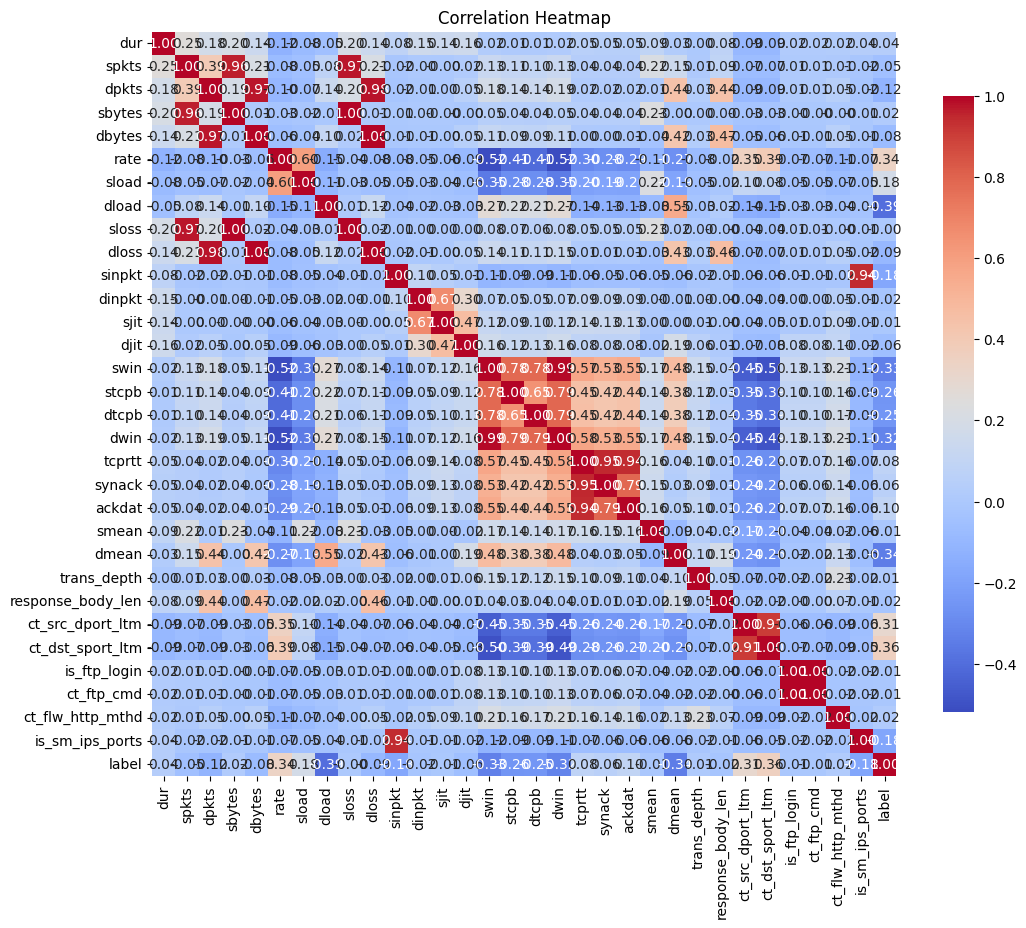

In [14]:
# Step 1: Select only numeric columns
numeric_columns = train_data.select_dtypes(include=[np.number]).columns
numeric_data = train_data[numeric_columns]

# Step 2: Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Step 3: Identify highly correlated features
threshold = 0.9
high_corr_pairs = []

# Loop through the correlation matrix to find highly correlated pairs
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# Convert to DataFrame for better visualization
high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])

# Print highly correlated features
print("Highly Correlated Features:")
print(high_corr_df)

# Step 4: Visualize the Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()

    Principal Component  Explained Variance  Cumulative Variance
0                     1        2.040518e-01             0.204052
1                     2        1.139509e-01             0.318003
2                     3        9.216969e-02             0.410172
3                     4        7.372391e-02             0.483896
4                     5        6.620235e-02             0.550099
5                     6        6.243034e-02             0.612529
6                     7        5.761261e-02             0.670142
7                     8        4.583565e-02             0.715977
8                     9        3.667328e-02             0.752650
9                    10        3.441472e-02             0.787065
10                   11        2.679249e-02             0.813858
11                   12        2.508071e-02             0.838938
12                   13        2.402221e-02             0.862961
13                   14        2.256617e-02             0.885527
14                   15  

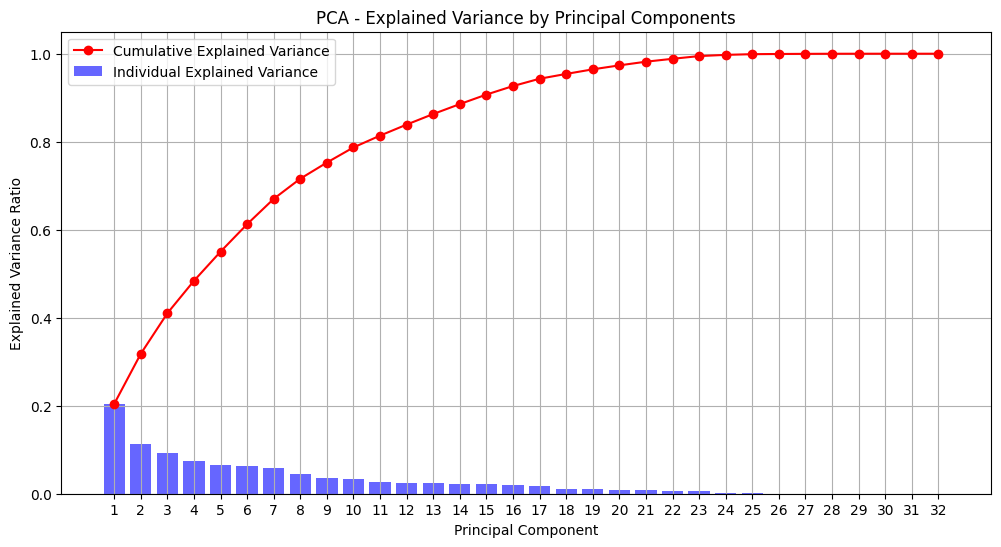

In [18]:
# Step 1: Select only numeric columns
numeric_columns = train_data.select_dtypes(include=[np.number]).columns
numeric_data = train_data[numeric_columns]

# Step 2: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Step 3: Apply PCA
pca = PCA()
pca.fit(scaled_data)

# Step 4: Analyze the results
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Create a DataFrame to hold the explained variance
explained_variance_df = pd.DataFrame({
    'Principal Component': np.arange(1, len(explained_variance) + 1),
    'Explained Variance': explained_variance,
    'Cumulative Variance': cumulative_variance
})

# Print explained variance
print(explained_variance_df)

# Step 5: Visualize explained variance
plt.figure(figsize=(12, 6))
plt.bar(explained_variance_df['Principal Component'], explained_variance_df['Explained Variance'], alpha=0.6, color='b', label='Individual Explained Variance')
plt.plot(explained_variance_df['Principal Component'], explained_variance_df['Cumulative Variance'], marker='o', color='r', label='Cumulative Explained Variance')
plt.title('PCA - Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(np.arange(1, len(explained_variance_df) + 1))
plt.legend()
plt.grid()
plt.show()

SSL

In [19]:
# Load data
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load parquet files
train = pd.read_parquet("/kaggle/input/unsw-nb15/UNSW_NB15_training-set.parquet")
test = pd.read_parquet("/kaggle/input/unsw-nb15/UNSW_NB15_testing-set.parquet")

In [20]:
# Combine for SSL pre-training
df = pd.concat([train, test])

In [21]:
# Drop unnecessary columns
df = df.drop(columns=['id', 'attack_cat'], errors='ignore')  # Ignore if columns don't exist

In [22]:
# Encode categorical features
cat_cols = ['proto', 'service', 'state']
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

In [23]:
# Normalize numerical features
num_cols = df.select_dtypes(include=[np.number]).columns.difference(['label'])
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [24]:
# Separate features and labels
X = df.drop('label', axis=1).values
y = df['label'].values

In [25]:
import tensorflow as tf
from tensorflow.keras import layers, models

2025-04-28 05:18:54.678099: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745817534.921263      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745817534.987427      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [26]:
# Data augmentation for network flows
def augment(x, noise_level=0.1):
    noise = tf.random.normal(tf.shape(x), mean=0.0, stddev=noise_level)
    return x + noise

In [27]:
# Define encoder (base model)
def get_encoder(input_shape):
    inputs = layers.Input(input_shape)
    x = layers.Dense(128, activation='relu')(inputs)
    x = layers.Dense(64, activation='relu')(x)
    outputs = layers.Dense(32)(x)  # Projection head
    return models.Model(inputs, outputs)

In [28]:
# Contrastive loss (NT-Xent)
def contrastive_loss(z1, z2, temperature=0.1):
    z1 = tf.math.l2_normalize(z1, axis=1)
    z2 = tf.math.l2_normalize(z2, axis=1)
    logits = tf.matmul(z1, z2, transpose_b=True) / temperature
    return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, tf.eye(tf.shape(z1)[0])))

In [29]:
# Initialize model
input_shape = (X.shape[1],)
encoder = get_encoder(input_shape)

# Training loop (SimCLR)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
batch_size = 256
epochs = 2

for epoch in range(epochs):
    for i in range(0, len(X), batch_size):
        batch = X[i:i+batch_size]
        x1 = augment(batch)
        x2 = augment(batch)

        with tf.GradientTape() as tape:
            z1 = encoder(x1)
            z2 = encoder(x2)
            loss = contrastive_loss(z1, z2)

        grads = tape.gradient(loss, encoder.trainable_weights)
        optimizer.apply_gradients(zip(grads, encoder.trainable_weights))

    print(f"Epoch {epoch+1}, Loss: {loss.numpy()}")

2025-04-28 05:19:34.851078: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1, Loss: 302.8145446777344
Epoch 2, Loss: 209.6648406982422


In [30]:
# Extract features from SSL encoder
X_ssl = encoder.predict(X)

8053/8053 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


In [31]:
# Split into train/test (use original splits for fair comparison)
X_train_ssl, X_test_ssl = X_ssl[:len(train)], X_ssl[len(train):]
y_train, y_test = y[:len(train)], y[len(train):]

In [32]:
# Train a classifier (Random Forest)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train_ssl, y_train)
y_pred = clf.predict(X_test_ssl)

print("With SSL Pre-training:")
print(classification_report(y_test, y_pred))

With SSL Pre-training:
              precision    recall  f1-score   support

           0       0.95      0.62      0.75     37000
           1       0.76      0.97      0.85     45332

    accuracy                           0.81     82332
   macro avg       0.85      0.80      0.80     82332
weighted avg       0.84      0.81      0.81     82332



In [33]:
# Train on raw features (no SSL)
X_train_raw, X_test_raw = X[:len(train)], X[len(train):]

clf_raw = RandomForestClassifier(n_estimators=100)
clf_raw.fit(X_train_raw, y_train)
y_pred_raw = clf_raw.predict(X_test_raw)

print("Without SSL Pre-training:")
print(classification_report(y_test, y_pred_raw))

Without SSL Pre-training:
              precision    recall  f1-score   support

           0       0.96      0.74      0.83     37000
           1       0.82      0.97      0.89     45332

    accuracy                           0.87     82332
   macro avg       0.89      0.86      0.86     82332
weighted avg       0.88      0.87      0.87     82332



In [34]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)  # Try smaller learning rate


In [35]:
def get_encoder(input_shape):
    inputs = layers.Input(input_shape)
    x = layers.Dense(256, activation='relu')(inputs)  # Increase size of hidden layers
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(64, activation='relu')(x)
    outputs = layers.Dense(32)(x)  # Projection head
    return models.Model(inputs, outputs)


In [36]:
def augment(x, noise_level=0.1, shift_range=0.05):
    # Adding Gaussian noise
    noise = tf.random.normal(tf.shape(x), mean=0.0, stddev=noise_level)
    x_noisy = x + noise

    # Random shift (if applicable to your features)
    shift = tf.random.uniform(tf.shape(x), minval=-shift_range, maxval=shift_range)
    x_augmented = x_noisy + shift
    return x_augmented


In [37]:
def get_encoder(input_shape):
    inputs = layers.Input(input_shape)
    x = layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(inputs)
    x = layers.Dropout(0.2)(x)  # Dropout layer for regularization
    x = layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
    outputs = layers.Dense(32)(x)  # Projection head
    return models.Model(inputs, outputs)


In [38]:
import lightgbm as lgb

clf_lgb = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.05, max_depth=20, random_state=42)
clf_lgb.fit(X_train_ssl, y_train)

y_pred_lgb = clf_lgb.predict(X_test_ssl)
print("LightGBM classification report:")
print(classification_report(y_test, y_pred_lgb))


[LightGBM] [Info] Number of positive: 119341, number of negative: 56000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.035764 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8160
[LightGBM] [Info] Number of data points in the train set: 175341, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.680622 -> initscore=0.756633
[LightGBM] [Info] Start training from score 0.756633
LightGBM classification report:
              precision    recall  f1-score   support

           0       0.93      0.54      0.68     37000
           1       0.72      0.97      0.83     45332

    accuracy                           0.77     82332
   macro avg       0.82      0.75      0.75     82332
weighted avg       0.81      0.77      0.76     82332



In [39]:
# Load your data (ensure this has already been done)
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Load parquet files
train = pd.read_parquet("/kaggle/input/unsw-nb15/UNSW_NB15_training-set.parquet")
test = pd.read_parquet("/kaggle/input/unsw-nb15/UNSW_NB15_testing-set.parquet")

# Combine datasets for SSL pre-training
df = pd.concat([train, test])

# Drop unnecessary columns
df = df.drop(columns=['id', 'attack_cat'], errors='ignore') 

# Encode categorical features
cat_cols = ['proto', 'service', 'state']
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

# Separate features (X) and labels (y)
X = df.drop('label', axis=1)
y = df['label']

# Split into train and test sets (train/test split from the original dataset)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the scaled data shapes
print(f"Scaled training data shape: {X_train_scaled.shape}")
print(f"Scaled testing data shape: {X_test_scaled.shape}")


Scaled training data shape: (206138, 34)
Scaled testing data shape: (51535, 34)


In [40]:
import pickle
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Define encoder model for SimCLR
def get_encoder(input_shape):
    inputs = layers.Input(input_shape)
    x = layers.Dense(128, activation='relu')(inputs)
    x = layers.Dense(64, activation='relu')(x)
    outputs = layers.Dense(32)(x)  # Projection head
    return models.Model(inputs, outputs)

# Contrastive loss function (NT-Xent)
def contrastive_loss(z1, z2, temperature=0.1):
    z1 = tf.math.l2_normalize(z1, axis=1)
    z2 = tf.math.l2_normalize(z2, axis=1)
    logits = tf.matmul(z1, z2, transpose_b=True) / temperature
    return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, tf.eye(tf.shape(z1)[0])))

# Data augmentation function
def augment(x, noise_level=0.1):
    noise = tf.random.normal(tf.shape(x), mean=0.0, stddev=noise_level)
    return x + noise

# Function to save results to a pickle file
def save_results(results, file_name='ssl_training_results.pkl'):
    with open(file_name, 'wb') as file:
        pickle.dump(results, file)

# Function to load previous results from a pickle file
def load_results(file_name='ssl_training_results.pkl'):
    try:
        with open(file_name, 'rb') as file:
            results = pickle.load(file)
        print(f"Loaded {len(results)} previous results.")
        return results
    except FileNotFoundError:
        print("No previous results found.")
        return []

# Initialize or load previous results
results = load_results()

# Set up training configurations (epochs to run separately in different shells)
epochs_list = [1, 2, 3]  
batch_size = 256
learning_rate = 0.001

# Loop through epoch configurations and save results for each
for epochs in epochs_list:
    print(f"\n=== Training SSL with {epochs} epochs ===")

    # Initialize the model for each configuration
    encoder = get_encoder((X_train_scaled.shape[1],))  # Input shape based on your data
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    
    # Initialize list to store accuracy after each epoch
    epoch_accuracies = []

    # Pre-training loop
    for epoch in range(epochs):
        for i in range(0, len(X_train_scaled), batch_size):
            batch = X_train_scaled[i:i+batch_size]
            x1 = augment(batch)
            x2 = augment(batch)

            with tf.GradientTape() as tape:
                z1 = encoder(x1)
                z2 = encoder(x2)
                loss = contrastive_loss(z1, z2)

            grads = tape.gradient(loss, encoder.trainable_weights)
            optimizer.apply_gradients(zip(grads, encoder.trainable_weights))

        # Calculate accuracy on the training set using KNN
        X_emb = encoder.predict(X_train_scaled)  # Get embeddings from encoder
        knn = KNeighborsClassifier(n_neighbors=1)  # Using KNN classifier
        knn.fit(X_emb, y_train)  # Train KNN on the embeddings
        y_pred = knn.predict(X_emb)  # Get predictions
        accuracy = accuracy_score(y_train, y_pred)  # Calculate accuracy

        # Store accuracy for the current epoch
        epoch_accuracies.append(accuracy)
        
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.numpy()}, Accuracy: {accuracy:.4f}")

    # After training, extract features using the encoder (SSL embeddings)
    X_emb = encoder.predict(X_train_scaled)
    X_train_ssl = X_emb[:len(train)]
    X_test_ssl = X_emb[len(train):]

    # Store the final result for this epoch configuration
    results.append({
        'epochs': epochs,
        'loss': loss.numpy(),
        'accuracy': epoch_accuracies[-1]  # Store the final accuracy after all epochs
    })

    # Save results after each epoch configuration
    save_results(results)

# Display results of SSL pre-training with different epochs
print("\nTraining Results:")
for result in results:
    print(f"Epochs: {result['epochs']} — Final Loss: {result['loss']:.4f}, Accuracy: {result['accuracy']:.4f}")


No previous results found.

=== Training SSL with 1 epochs ===
6442/6442 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
Epoch 1/1, Loss: 12.554841041564941, Accuracy: 0.9886
6442/6442 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step

=== Training SSL with 2 epochs ===
6442/6442 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
Epoch 1/2, Loss: 46.600746154785156, Accuracy: 0.9886
6442/6442 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
Epoch 2/2, Loss: 44.934722900390625, Accuracy: 0.9886
6442/6442 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step

=== Training SSL with 3 epochs ===
6442/6442 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
Epoch 1/3, Loss: 28.823802947998047, Accuracy: 0.9886
6442/6442 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
Epoch 2/3, Loss: 18.983217239379883, Accuracy: 0.9886
6442/6442 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
Epoch 3/3, Loss: 16.310741424560547, Accuracy: 0.9886
6442/6442 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step

Training Results:
Epochs: 1 — Final Loss: 12.5548, Accuracy: 0.9886
Epochs: 2 — Final Loss: 44.9347, Accuracy: 0.9886
Epochs: 3 — Final Loss: 16.3107, Ac

In [41]:
# Load and print results
results = load_results()
print("\nTraining Results:")
for result in results:
    print(f"Epochs: {result['epochs']} — Final Loss: {result['loss']:.4f}, Accuracy: {result['accuracy']:.4f}")


Loaded 3 previous results.

Training Results:
Epochs: 1 — Final Loss: 12.5548, Accuracy: 0.9886
Epochs: 2 — Final Loss: 44.9347, Accuracy: 0.9886
Epochs: 3 — Final Loss: 16.3107, Accuracy: 0.9886


In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train baseline RandomForest on raw scaled data (no SSL)
clf_baseline = RandomForestClassifier(n_estimators=100)
clf_baseline.fit(X_train_scaled, y_train)

# Predict and evaluate on test data
y_pred_baseline = clf_baseline.predict(X_test_scaled)
print("Baseline RandomForest Classification Report:")
print(classification_report(y_test, y_pred_baseline))


Baseline RandomForest Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     18613
           1       0.96      0.95      0.95     32922

    accuracy                           0.94     51535
   macro avg       0.94      0.94      0.94     51535
weighted avg       0.94      0.94      0.94     51535



In [43]:
# Extract SSL features from encoder for training and testing sets
X_train_ssl = encoder.predict(X_train_scaled)  # For training data
X_test_ssl = encoder.predict(X_test_scaled)  # For testing data

# Ensure the labels match the SSL features
y_train, y_test = y[:len(X_train_ssl)], y[len(X_train_ssl):]

# Print shapes to confirm alignment
print(f"SSL training features shape: {X_train_ssl.shape}")
print(f"SSL testing features shape: {X_test_ssl.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")


6442/6442 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
1611/1611 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
SSL training features shape: (206138, 32)
SSL testing features shape: (51535, 32)
Training labels shape: (206138,)
Testing labels shape: (51535,)
